# IM/DD Models and Datasets

In the following we show the data generated by the IM/DD links used in the `LCDDataset` and the `SSMFDataset`.


## LCD-Task

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from IMDD import IMDDModel, LCDParams, helpers

link = IMDDModel(LCDParams)

print("Link parameters: ", LCDParams)
print("Link: ", link)

ModuleNotFoundError: No module named 'IMDD.imdd_model'

In [2]:
# Create indices in X to send
qs = link.source()
print("Messages:\n", qs, qs.shape)

# Each of those indices correspond to a pair of bits
gray_labels = helpers.get_graylabel(2)
print("Gray bits:\n", gray_labels)

# bits that get sent
bits = gray_labels[qs]
print("Bits to send:\n", bits, bits.shape)

NameError: name 'link' is not defined

In [3]:
# Now we sent the symbols corresponding to the indices and get received symbols
# at the receiver side in shape (N, n_taps) with y[k] at (k, n_taps//2)
y_chunks = link(qs)
print("Received chunked symbols:\n", y_chunks, y_chunks.shape)

Received chunked symbols:
 tensor([[0.9243, 3.2544, 3.5556,  ..., 1.3333, 2.9358, 1.3141],
        [0.6478, 0.9243, 3.2544,  ..., 0.9055, 1.3333, 2.9358],
        [2.2268, 0.6478, 0.9243,  ..., 3.5556, 0.9055, 1.3333],
        ...,
        [0.9055, 1.3333, 2.9358,  ..., 4.4678, 1.0083, 1.8984],
        [3.5556, 0.9055, 1.3333,  ..., 1.3141, 4.4678, 1.0083],
        [3.2544, 3.5556, 0.9055,  ..., 2.9358, 1.3141, 4.4678]]) torch.Size([10000, 7])


/tmp/ipykernel_4952/2608589793.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 0].set_yticklabels(["00", "01", "11", "10"])
/tmp/ipykernel_4952/2608589793.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 1].set_xticklabels(["00", "01", "11", "10"])


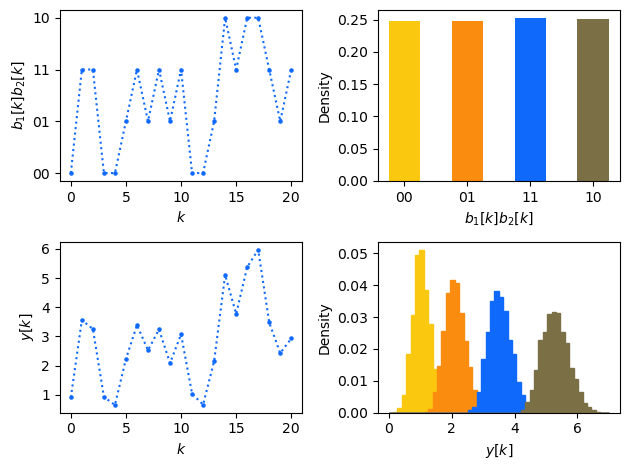

In [4]:
def plot_data(indices, samples, params):
    color = ["#FAC90F", "#FA8D0F", "#0F69FA", "#7A6F45"]

    fig, axs = plt.subplots(nrows=2, ncols=2)

    axs[0, 0].scatter(np.arange(0, 21), indices[:21].numpy(), color=color[2], s=5)
    axs[0, 0].plot(np.arange(0, 21), indices[:21].numpy(), ls=":", color=color[2])
    axs[0, 0].set_ylabel("$b_1[k]b_2[k]$")
    axs[0, 0].set_xlabel("$k$")
    axs[0, 0].set_yticklabels(["00", "01", "11", "10"])
    axs[0, 0].set_yticks([0, 1, 2, 3])

    axs[0, 1].set_ylabel("Density")
    axs[0, 1].set_xlabel("$b_1[k]b_2[k]$")
    for i in range(4):
        labels, counts = np.unique(indices[indices == i].numpy(), return_counts=True)
        axs[0, 1].bar(labels, counts / params.N, align='center', width=0.5, color=color[i])
    axs[0, 1].set_xticklabels(["00", "01", "11", "10"])
    axs[0, 1].set_xticks([0, 1, 2, 3])

    axs[1, 0].scatter(np.arange(21), samples[:21, params.n_taps//2], color=color[2], s=5)
    axs[1, 0].plot(samples[:21, params.n_taps//2], ":", color=color[2])
    axs[1, 0].set_ylabel(r"$y[k]$")
    axs[1, 0].set_xlabel("$k$")

    for i in range(4):
        (counts, bins) = np.histogram(
            samples[:, params.n_taps//2].numpy()[indices == i],
            bins=np.linspace(0, 7, 51))
        axs[1, 1].hist(
            bins[:-1], bins, weights=counts / params.N, linewidth=1, alpha=1,
            histtype="stepfilled", edgecolor=color[i], color=color[i])
    axs[1, 1].set_ylabel("Density")
    axs[1, 1].set_xlabel(r"$y[k]$")

    plt.tight_layout()
    plt.show()

plot_data(qs, y_chunks, LCDParams)

## SSMF-Task

/tmp/ipykernel_4952/2608589793.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 0].set_yticklabels(["00", "01", "11", "10"])
/tmp/ipykernel_4952/2608589793.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 1].set_xticklabels(["00", "01", "11", "10"])


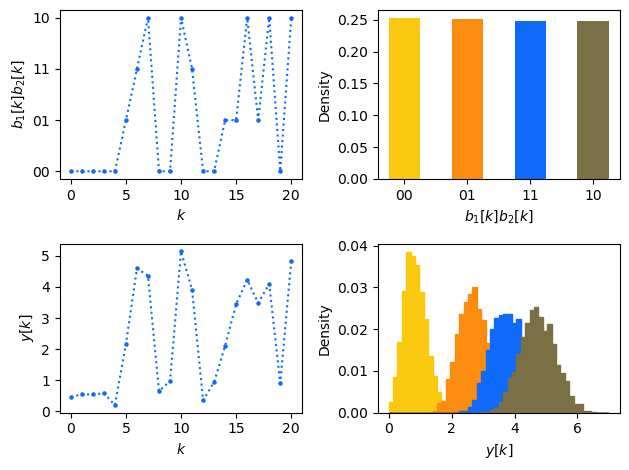

Link parameters:  IMDDParams(N=10000, n_taps=7, alphabet=tensor([-3., -1.,  1.,  3.]), oversampling_factor=3, baudrate=112, wavelength=1270, dispersion_parameter=-5, fiber_length=4, noise_power_db=20.0, roll_off=0.2, bias=2.25)
Link:  IMDDModel(
  IMDDParams(N=10000, n_taps=21, alphabet=tensor([0.0000, 1.0000, 1.4142, 1.7321], dtype=torch.float64), oversampling_factor=3, baudrate=50, wavelength=1550, dispersion_parameter=-17, fiber_length=5, noise_power_db=20.0, roll_off=0.2, bias=0.25)
  (transmitter): Transmitter()
  (channel): OpticalChannel()
  (receiver): Receiver()
)


In [5]:
from IMDD import SSMFParams

link = IMDDModel(SSMFParams)
qs = link.source()
y_chunks = link(qs)

plot_data(qs, y_chunks, SSMFParams)

print("Link parameters: ", LCDParams)
print("Link: ", link)

# Dataset usage


In [16]:
from IMDD import LCDDataset

# Dataset
lcd_dataset = LCDDataset()
print("Dataset size: ", len(lcd_dataset))

y_chunk, q = lcd_dataset[42]
print("y_chunk:\n", y_chunk, y_chunk.shape)
print("q:\n", q, q.shape)
print("bits b_1 and b_2 corresponding to q:\n", gray_labels[q])
print("Symbol x corresponding to q:\n", LCDParams.alphabet[q])

# We can change the number of taps
lcd_dataset = LCDDataset()
lcd_dataset.set_n_taps(5)
y_chunk, q = lcd_dataset[42]
print("y_chunk:\n", y_chunk, y_chunk.shape)

Dataset size:  10000
y_chunk:
 tensor([2.3759, 1.8477, 2.1469, 2.2029, 1.1585, 1.7500, 3.3548]) torch.Size([7])
q:
 tensor(1) torch.Size([])
bits b_1 and b_2 corresponding to q:
 [0 1]
Symbol x corresponding to q:
 tensor(-1.)
y_chunk:
 tensor([4.4243, 4.7296, 1.0869, 2.9793, 2.0886]) torch.Size([5])


In [26]:
from torch.utils.data import DataLoader

lcd_dataset = LCDDataset()
dataloader = DataLoader(lcd_dataset, batch_size=32, shuffle=True)

y_chunk_batch, q_batch = next(iter(dataloader))
print("y_chunk_batch:\n", y_chunk_batch, y_chunk_batch.shape)
print("q:\n", q_batch, q_batch.shape)

y_chunk_batch:
 tensor([[3.5176, 2.4536, 0.8566, 3.1779, 2.2591],
        [3.5335, 5.6604, 3.6377, 0.9268, 1.8831],
        [0.9347, 2.5577, 4.8508, 1.1007, 5.3422],
        [2.0552, 2.0388, 5.0963, 5.9263, 3.9925],
        [1.3562, 3.6278, 5.7590, 3.6447, 0.6638],
        [3.5622, 0.8888, 3.4219, 6.0483, 5.5262],
        [0.9570, 5.5914, 5.6184, 0.7640, 0.8883],
        [4.2016, 4.9072, 1.2670, 2.9483, 1.2117],
        [3.3308, 1.3365, 2.0560, 5.4663, 3.4096],
        [4.9111, 1.2961, 0.8421, 2.4363, 5.1984],
        [3.9659, 3.4658, 0.8928, 0.8068, 5.6756],
        [3.6143, 3.7549, 1.9470, 1.1370, 4.6348],
        [4.8266, 2.5035, 0.9232, 2.0386, 1.8264],
        [3.5349, 3.8013, 3.2848, 4.0795, 3.4677],
        [1.4141, 1.8263, 2.2028, 0.9549, 1.4580],
        [5.2326, 2.3595, 5.3755, 3.8018, 0.7479],
        [5.0911, 1.0798, 3.4650, 3.7552, 3.4749],
        [1.1589, 2.8775, 4.0280, 5.1432, 2.6165],
        [5.5801, 5.8525, 3.3895, 3.2745, 3.4912],
        [0.7875, 3.2255, 2.1051, 2